In [1]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Step 1: Load the dataset
file_path = Path("external_version_022425.csv")
# file_path = Path("../Resources/new_iris_data.csv")
df = pd.read_csv(file_path)
df


,SampleName,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn
0,A,0.250,0.250,2.40,0.250,62.00,50.0,14.0,0.700,14.000,0.250,98.0,0.250,3.20,0.250,0.250,0.250,2.70
1,B,0.490,0.490,2.00,0.490,55.00,46.0,11.0,0.530,12.000,0.490,80.0,0.490,2.80,0.490,0.490,0.490,2.20
2,C,0.550,0.550,1.90,0.550,54.00,45.0,11.0,0.550,12.000,0.550,78.0,0.550,2.80,0.550,0.550,0.550,2.00
3,D,0.389,0.389,4.50,0.389,1.90,26.0,8.4,0.389,0.389,0.389,45.0,0.389,40.00,0.389,0.389,0.389,0.63
4,E,0.250,0.250,0.33,0.250,2.40,18.0,6.0,0.250,3.900,0.250,56.0,0.250,3.50,0.250,0.250,0.250,0.25
5,F,0.270,0.270,0.29,0.270,1.50,9.1,2.3,0.270,3.900,0.270,24.0,0.270,1.30,0.270,0.270,0.270,0.27
6,G,0.280,0.280,0.40,0.280,2.50,22.0,6.8,0.280,4.200,0.280,55.0,0.280,4.20,0.280,0.280,0.280,0.28
7,H,0.260,0.260,0.46,0.600,2.60,24.0,9.0,0.260,5.400,0.260,64.0,0.260,4.70,0.260,0.260,0.260,0.37
8,I,0.250,0.250,0.37,0.250,2.00,22.0,6.5,0.250,4.700,0.250,44.0,0.250,3.60,0.250,0.250,0.250,0.25
9,J,0.260,0.260,0.50,0.260,2.50,26.0,8.8,0.260,6.800,0.260,61.0,0.260,4.30,0.260,0.260,0.260,0.26


In [4]:
#Show summary statistics
df.describe()

,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000
mean,0.342944,3.879389,25.791667,1.620500,631.291667,241.561111,25.400000,2.351056,24.038278,0.990500,119.722222,0.368222,41.325000,0.370444,0.47600,0.355444,8.710556
std,0.158536,11.395798,91.250455,5.102533,2298.564104,649.138803,73.238121,6.285180,71.126384,2.531283,268.813691,0.212861,118.656846,0.219507,0.62407,0.179543,28.416748
min,0.240000,0.240000,0.290000,0.240000,0.250000,1.000000,1.100000,0.240000,0.389000,0.240000,13.000000,0.240000,0.250000,0.240000,0.24000,0.240000,0.240000
25%,0.252500,0.252500,0.377500,0.252500,2.025000,19.000000,6.125000,0.260000,3.900000,0.252500,44.250000,0.252500,2.800000,0.252500,0.25250,0.252500,0.260000
50%,0.270000,0.270000,0.460000,0.275000,2.500000,23.000000,8.250000,0.275000,4.500000,0.270000,58.500000,0.270000,3.600000,0.270000,0.27000,0.270000,0.280000
75%,0.361750,0.361750,1.975000,0.464750,41.225000,40.500000,10.500000,0.494750,10.700000,0.361750,74.500000,0.361750,4.450000,0.361750,0.36175,0.361750,1.657500
max,0.839000,46.000000,387.000000,22.000000,9745.000000,2384.000000,318.000000,25.000000,307.000000,11.000000,1192.000000,0.960000,490.000000,1.000000,2.90000,0.839000,120.000000


In [5]:
# Step 2: Explore the dataset show all nulls.
df.isnull().sum()


SampleName    2
Ag            2
Al            2
Ca            2
Cu            2
Fe            2
K             2
Mg            2
Mn            2
Na            2
Ni            2
P             2
Pb            2
Si            2
Sn            2
Ti            2
V             2
Zn            2
dtype: int64

In [6]:
# Step 3: Handle missing values (if any)
df = df.dropna()  # Drop missing values (or consider imputation if necessary)
df

,SampleName,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn
0,A,0.250,0.250,2.40,0.250,62.00,50.0,14.0,0.700,14.000,0.250,98.0,0.250,3.20,0.250,0.250,0.250,2.70
1,B,0.490,0.490,2.00,0.490,55.00,46.0,11.0,0.530,12.000,0.490,80.0,0.490,2.80,0.490,0.490,0.490,2.20
2,C,0.550,0.550,1.90,0.550,54.00,45.0,11.0,0.550,12.000,0.550,78.0,0.550,2.80,0.550,0.550,0.550,2.00
3,D,0.389,0.389,4.50,0.389,1.90,26.0,8.4,0.389,0.389,0.389,45.0,0.389,40.00,0.389,0.389,0.389,0.63
4,E,0.250,0.250,0.33,0.250,2.40,18.0,6.0,0.250,3.900,0.250,56.0,0.250,3.50,0.250,0.250,0.250,0.25
5,F,0.270,0.270,0.29,0.270,1.50,9.1,2.3,0.270,3.900,0.270,24.0,0.270,1.30,0.270,0.270,0.270,0.27
6,G,0.280,0.280,0.40,0.280,2.50,22.0,6.8,0.280,4.200,0.280,55.0,0.280,4.20,0.280,0.280,0.280,0.28
7,H,0.260,0.260,0.46,0.600,2.60,24.0,9.0,0.260,5.400,0.260,64.0,0.260,4.70,0.260,0.260,0.260,0.37
8,I,0.250,0.250,0.37,0.250,2.00,22.0,6.5,0.250,4.700,0.250,44.0,0.250,3.60,0.250,0.250,0.250,0.25
9,J,0.260,0.260,0.50,0.260,2.50,26.0,8.8,0.260,6.800,0.260,61.0,0.260,4.30,0.260,0.260,0.260,0.26


In [7]:
# Step 4: Select numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols]



In [8]:
# Step 5: Standardize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


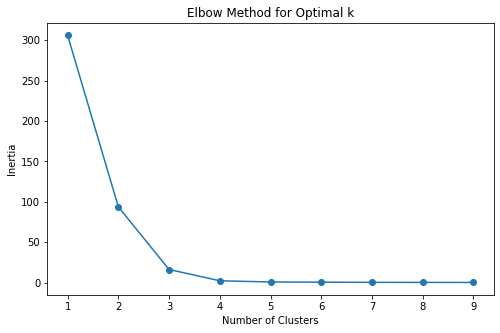

In [9]:
# Step 6: Find optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




# Importance of Scaling on step 8. you get better k_values in elbow method. you essentially do have 4 different samples/classes or k_values. if you don't scale it, it thinks it has 3 optimal k values. maybe  just scale to get a more accurate k_values. and just use the data or pre-scaled data for cluster analysis. cluster analysis of the scaled data thinks 520 is also 45.

# PCA

Explained variance ratios: [0.80459526 0.16903437]


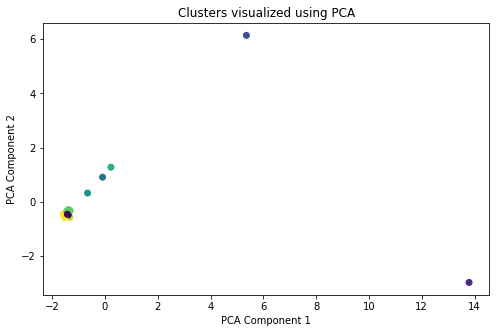

In [11]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(StandardScaler().fit_transform(df[numerical_cols]))

print("Explained variance ratios:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=model.labels_, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters visualized using PCA")
plt.show()


Explained Variance by Component: [0.80459526 0.16903437]


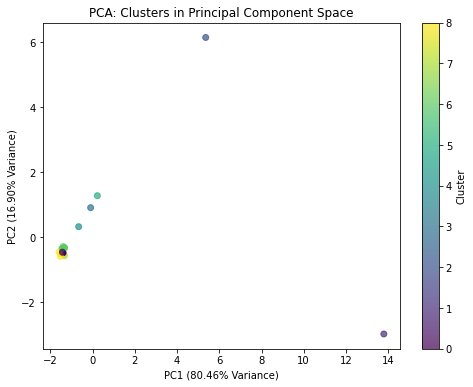

In [12]:

data_scaled = scaler.fit_transform(df[numerical_cols])  

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio (importance of each PC)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

# Plot PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=model.labels_, cmap="viridis", alpha=0.7)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% Variance)")
plt.title("PCA: Clusters in Principal Component Space")
plt.colorbar(label="Cluster")
plt.show()


# This will show which metals (features) contribute most to PC1 and PC2, revealing the most important ones.

In [13]:
# Get feature contributions to each PC
pca_components = pd.DataFrame(pca.components_, columns=numerical_cols, index=['PC1', 'PC2'])
print(pca_components)

           Ag        Al        Ca        Cu        Fe         K        Mg  \
PC1  0.169234  0.268183  0.258832  0.252817  0.130324  0.264017  0.251343   
PC2  0.433376 -0.035622 -0.168963 -0.208786  0.482057  0.080829 -0.216994   

           Mn        Na        Ni        P        Pb        Si        Sn  \
PC1  0.195364  0.255620  0.259888  0.25039  0.249271  0.266835  0.252228   
PC2  0.371633 -0.191153 -0.162292 -0.21989  0.196217 -0.071373  0.179487   

           Ti         V        Zn  
PC1  0.264232  0.221677  0.262685  
PC2 -0.117122  0.308473 -0.136941  


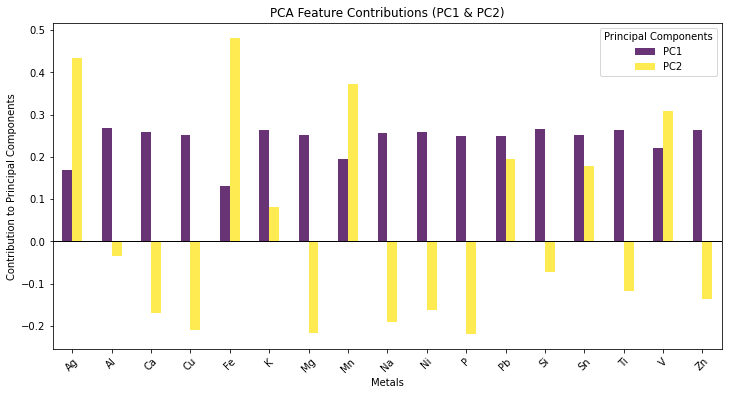

In [14]:
# Create a bar plot for PCA feature contributions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot PC1 and PC2 contributions
pca_components.T.plot(kind='bar', ax=ax, colormap='viridis', alpha=0.8)
ax.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at zero
plt.xlabel("Metals")
plt.ylabel("Contribution to Principal Components")
plt.title("PCA Feature Contributions (PC1 & PC2)")
plt.xticks(rotation=45)
plt.legend(title="Principal Components")
plt.show()


In [10]:
print(df.corr()["Fe"].sort_values(ascending=False))


Fe    1.000000
Mn    0.953020
Ag    0.819345
V     0.748772
Pb    0.653382
Sn    0.637276
K     0.635284
Al    0.463672
Si    0.402029
Zn    0.292862
Ti    0.285604
Ni    0.241977
Ca    0.238746
Na    0.192633
Cu    0.162481
Mg    0.146253
P     0.137063
Name: Fe, dtype: float64


In [11]:
#Even if Fe has large variance, it might not create clear separations between clusters.
import seaborn as sns
sns.boxplot(x=df["Cluster"], y=df["Fe"])
plt.show()


KeyError: 'Cluster'

# End of feature importance

In [15]:
# Step 7: Apply K-Means with optimal k (assuming k=3 as a starting point, update based on Elbow Method)
k = 5  # Change this based on elbow point
model = KMeans(n_clusters=k, random_state=5)
model.fit(data)
# df['Cluster'] = model.labels_


KMeans(n_clusters=5, random_state=5)

In [16]:
predictions = model.predict(data)
print(predictions)

[3 3 3 4 4 0 4 4 4 4 4 1 2 0 0 0 4 4]


In [17]:
# Convert the scaled NumPy array back to a DataFrame
data_df = pd.DataFrame(data, columns=numerical_cols)

# Add the cluster labels
data_df["class"] = model.labels_

# Display the updated DataFrame
data_df

,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn,class
0,0.250,0.250,2.40,0.250,62.00,50.0,14.0,0.700,14.000,0.250,98.0,0.250,3.20,0.250,0.250,0.250,2.70,3
1,0.490,0.490,2.00,0.490,55.00,46.0,11.0,0.530,12.000,0.490,80.0,0.490,2.80,0.490,0.490,0.490,2.20,3
2,0.550,0.550,1.90,0.550,54.00,45.0,11.0,0.550,12.000,0.550,78.0,0.550,2.80,0.550,0.550,0.550,2.00,3
3,0.389,0.389,4.50,0.389,1.90,26.0,8.4,0.389,0.389,0.389,45.0,0.389,40.00,0.389,0.389,0.389,0.63,4
4,0.250,0.250,0.33,0.250,2.40,18.0,6.0,0.250,3.900,0.250,56.0,0.250,3.50,0.250,0.250,0.250,0.25,4
5,0.270,0.270,0.29,0.270,1.50,9.1,2.3,0.270,3.900,0.270,24.0,0.270,1.30,0.270,0.270,0.270,0.27,0
6,0.280,0.280,0.40,0.280,2.50,22.0,6.8,0.280,4.200,0.280,55.0,0.280,4.20,0.280,0.280,0.280,0.28,4
7,0.260,0.260,0.46,0.600,2.60,24.0,9.0,0.260,5.400,0.260,64.0,0.260,4.70,0.260,0.260,0.260,0.37,4
8,0.250,0.250,0.37,0.250,2.00,22.0,6.5,0.250,4.700,0.250,44.0,0.250,3.60,0.250,0.250,0.250,0.25,4
9,0.260,0.260,0.50,0.260,2.50,26.0,8.8,0.260,6.800,0.260,61.0,0.260,4.30,0.260,0.260,0.260,0.26,4


In [18]:
print(df.columns)  # Check if "Cluster" exists


Index(['SampleName', 'Ag', 'Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Ni',
       'P', 'Pb', 'Si', 'Sn', 'Ti', 'V', 'Zn'],
      dtype='object')


In [19]:
data_df["Cluster"] = model.labels_
model.labels_


array([3, 3, 3, 4, 4, 0, 4, 4, 4, 4, 4, 1, 2, 0, 0, 0, 4, 4])

In [20]:
data_df

,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn,class,Cluster
0,0.250,0.250,2.40,0.250,62.00,50.0,14.0,0.700,14.000,0.250,98.0,0.250,3.20,0.250,0.250,0.250,2.70,3,3
1,0.490,0.490,2.00,0.490,55.00,46.0,11.0,0.530,12.000,0.490,80.0,0.490,2.80,0.490,0.490,0.490,2.20,3,3
2,0.550,0.550,1.90,0.550,54.00,45.0,11.0,0.550,12.000,0.550,78.0,0.550,2.80,0.550,0.550,0.550,2.00,3,3
3,0.389,0.389,4.50,0.389,1.90,26.0,8.4,0.389,0.389,0.389,45.0,0.389,40.00,0.389,0.389,0.389,0.63,4,4
4,0.250,0.250,0.33,0.250,2.40,18.0,6.0,0.250,3.900,0.250,56.0,0.250,3.50,0.250,0.250,0.250,0.25,4,4
5,0.270,0.270,0.29,0.270,1.50,9.1,2.3,0.270,3.900,0.270,24.0,0.270,1.30,0.270,0.270,0.270,0.27,0,0
6,0.280,0.280,0.40,0.280,2.50,22.0,6.8,0.280,4.200,0.280,55.0,0.280,4.20,0.280,0.280,0.280,0.28,4,4
7,0.260,0.260,0.46,0.600,2.60,24.0,9.0,0.260,5.400,0.260,64.0,0.260,4.70,0.260,0.260,0.260,0.37,4,4
8,0.250,0.250,0.37,0.250,2.00,22.0,6.5,0.250,4.700,0.250,44.0,0.250,3.60,0.250,0.250,0.250,0.25,4,4
9,0.260,0.260,0.50,0.260,2.50,26.0,8.8,0.260,6.800,0.260,61.0,0.260,4.30,0.260,0.260,0.260,0.26,4,4


#### if you just look at the graph, it's hard to identify the pattern or samples


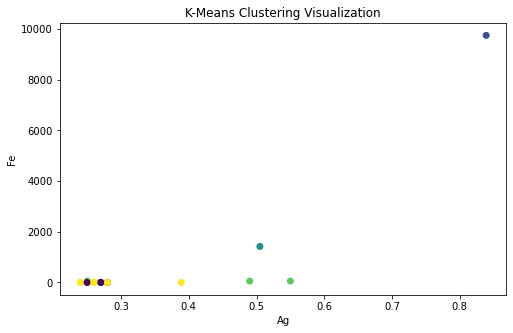

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(x=data_df["Ag"], y=data_df['Fe'], c=data_df['class'])
plt.xlabel('Ag')
plt.ylabel('Fe')
plt.title("K-Means Clustering Visualization")
plt.show()

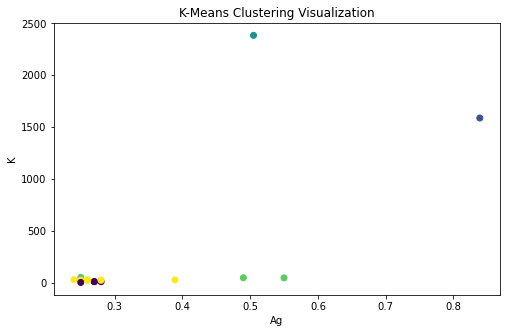

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(x=data_df["Ag"], y=data_df['K'], c=data_df['class'])
plt.xlabel('Ag')
plt.ylabel('K')
plt.title("K-Means Clustering Visualization")
plt.show()

# Data Simplification – Reducing complexity by categorizing data into groups, making it easier to interpret.
Pattern Recognition – Identifying natural groupings within data that may not be obvious.
Anomaly Detection – Spotting outliers or unusual data points that do not fit into any cluster.
Market Segmentation – Dividing customers or products into distinct groups based on behavior, preferences, or characteristics.
Feature Engineering – Creating new variables based on cluster memberships to improve machine learning models.
Exploratory Data Analysis – Understanding the structure of a dataset before applying more complex models.
Decision Making – Supporting business strategies by segmenting users, predicting behavior, or optimizing processes.

# Key Takeaways

K-Means assigns data points to clusters based on feature similarity. Choosing the correct number of clusters (k) is important. The elbow method helps find the best k. Standardizing features improves clustering performance when features have different scales. Clustering helps uncover hidden patterns in unlabeled datasets.

In [23]:
# Step 9: Display clustered data
display(df.head())

,SampleName,Ag,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Ni,P,Pb,Si,Sn,Ti,V,Zn
0,A,0.250,0.250,2.40,0.250,62.0,50.0,14.0,0.700,14.000,0.250,98.0,0.250,3.2,0.250,0.250,0.250,2.70
1,B,0.490,0.490,2.00,0.490,55.0,46.0,11.0,0.530,12.000,0.490,80.0,0.490,2.8,0.490,0.490,0.490,2.20
2,C,0.550,0.550,1.90,0.550,54.0,45.0,11.0,0.550,12.000,0.550,78.0,0.550,2.8,0.550,0.550,0.550,2.00
3,D,0.389,0.389,4.50,0.389,1.9,26.0,8.4,0.389,0.389,0.389,45.0,0.389,40.0,0.389,0.389,0.389,0.63
4,E,0.250,0.250,0.33,0.250,2.4,18.0,6.0,0.250,3.900,0.250,56.0,0.250,3.5,0.250,0.250,0.250,0.25


In [24]:
# Assuming you have a list of letters corresponding to your data points
letters = list("ABCDEFGHIJKLMNOPQR")  # Modify based on actual dataset length

# Create a DataFrame with assigned clusters
df_clusters = pd.DataFrame({
    "Letter": letters,
    "Cluster": model.labels_[:len(letters)]  # Assign first n labels where n = number of letters
})

# Display the grouped data
df_clusters = df_clusters.sort_values("Cluster")  # Sort by cluster for better readability
display(df_clusters)

,Letter,Cluster
15,P,0
14,O,0
5,F,0
13,N,0
11,L,1
12,M,2
0,A,3
1,B,3
2,C,3
10,K,4


In [25]:
# Display the grouped data sorted by alphabet
df_clusters_A = df_clusters.sort_values("Letter")  # Sort by cluster for better readability
display(df_clusters_A)

,Letter,Cluster
0,A,3
1,B,3
2,C,3
3,D,4
4,E,4
5,F,0
6,G,4
7,H,4
8,I,4
9,J,4


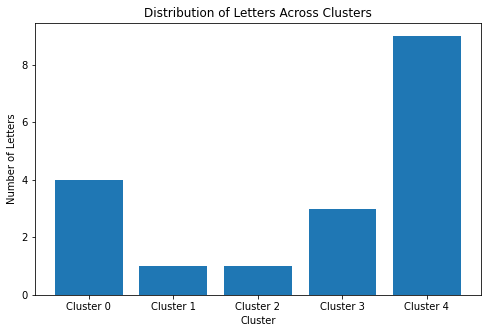

In [26]:
# Count the number of letters in each cluster
cluster_counts = df_clusters["Cluster"].value_counts().sort_index()

# Plot the cluster distribution
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, tick_label=[f"Cluster {i}" for i in cluster_counts.index])
plt.xlabel("Cluster")
plt.ylabel("Number of Letters")
plt.title("Distribution of Letters Across Clusters")
plt.show()

In [24]:
# plt.figure(figsize=(8, 5))
# scatter = plt.scatter(data_df.iloc[:len(letters), 0], data_df.iloc[:len(letters), 1], 
#                       c=model.labels_[:len(letters)], cmap="viridis", alpha=0.8)

# # Add letter labels to points
# for i, letter in enumerate(letters):
#     plt.text(data_df.iloc[i, 0], data_df.iloc[i, 1], letter, fontsize=12, ha="right")

# plt.xlabel(numerical_cols[0])
# plt.ylabel(numerical_cols[4])
# plt.title("Clustered Letters with K-Means")
# plt.colorbar(scatter, label="Cluster")
# plt.show()

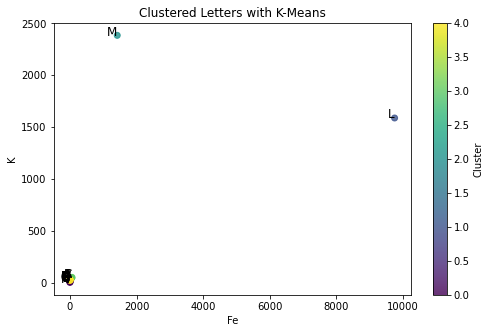

In [24]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df["Fe"], df["K"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["K"].iloc[i], letter, fontsize=12, ha="right")

plt.xlabel("Fe")  # Now in original scale
plt.ylabel("K")
plt.title("Clustered Letters with K-Means")
plt.colorbar(scatter, label="Cluster")
plt.show()

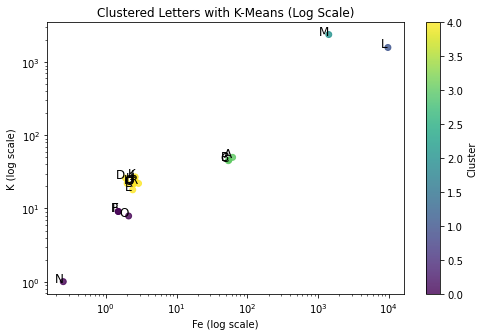

In [27]:
#convert to log chart
plt.figure(figsize=(8, 5))

# Scatter plot with log scale
scatter = plt.scatter(df["Fe"], df["K"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["K"].iloc[i], letter, fontsize=12, ha="right")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Fe (log scale)")
plt.ylabel("K (log scale)")
plt.title("Clustered Letters with K-Means (Log Scale)")
plt.colorbar(scatter, label="Cluster")
plt.show()

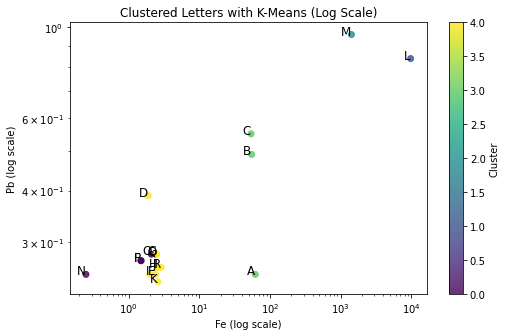

In [28]:
#convert to log chart
plt.figure(figsize=(8, 5))

# Scatter plot with log scale
scatter = plt.scatter(df["Fe"], df["Pb"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["Pb"].iloc[i], letter, fontsize=12, ha="right")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Fe (log scale)")
plt.ylabel("Pb (log scale)")
plt.title("Clustered Letters with K-Means (Log Scale)")
plt.colorbar(scatter, label="Cluster")
plt.show()

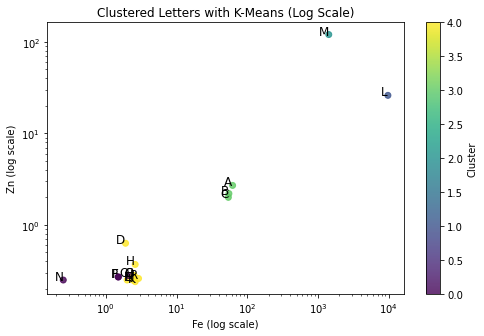

In [29]:
#convert to log chart
plt.figure(figsize=(8, 5))

# Scatter plot with log scale
scatter = plt.scatter(df["Fe"], df["Zn"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["Zn"].iloc[i], letter, fontsize=12, ha="right")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Fe (log scale)")
plt.ylabel("Zn (log scale)")
plt.title("Clustered Letters with K-Means (Log Scale)")
plt.colorbar(scatter, label="Cluster")
plt.show()

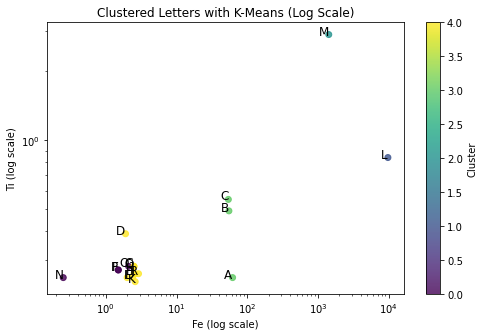

In [30]:
#convert to log chart
plt.figure(figsize=(8, 5))

# Scatter plot with log scale
scatter = plt.scatter(df["Fe"], df["Ti"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["Ti"].iloc[i], letter, fontsize=12, ha="right")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Fe (log scale)")
plt.ylabel("Ti (log scale)")
plt.title("Clustered Letters with K-Means (Log Scale)")
plt.colorbar(scatter, label="Cluster")
plt.show()

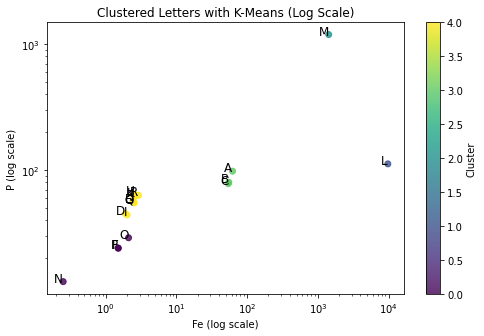

In [28]:
#convert to log chart
plt.figure(figsize=(8, 5))

# Scatter plot with log scale
scatter = plt.scatter(df["Fe"], df["P"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["P"].iloc[i], letter, fontsize=12, ha="right")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Fe (log scale)")
plt.ylabel("P (log scale)")
plt.title("Clustered Letters with K-Means (Log Scale)")
plt.colorbar(scatter, label="Cluster")
plt.show()

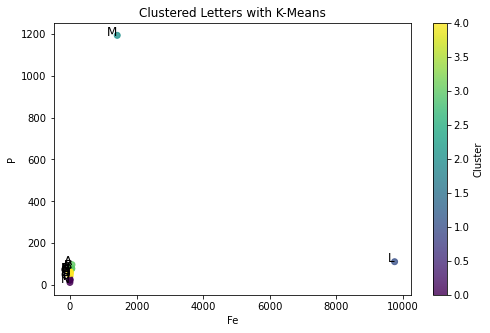

In [31]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df["Fe"], df["P"], c=model.labels_, cmap="viridis", alpha=0.8)

# Add letter labels
for i, letter in enumerate(letters):
    plt.text(df["Fe"].iloc[i], df["P"].iloc[i], letter, fontsize=12, ha="right")

plt.xlabel("Fe")  # Now in original scale
plt.ylabel("P")
plt.title("Clustered Letters with K-Means")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [29]:
#Make sure the length of your letters list matches the number of points you're plotting.
print("Number of data points:", len(df))
print("Number of letters:", len(letters))


Number of data points: 18
Number of letters: 18
